In [6]:
import numpy as np
import pandas as pd
from math import pi
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
#1 Calculating Heat flow distribution using Gaussian elimination
def gaussian_elimination(A,b):
  A=A.astype(float).copy()
  b=b.astype(float).copy()
  n=A.shape[0]

  for k in range(n-1):
    max_row=np.argmax(np.abs(A[k:,k])) + k
    if A[max_row, k] == 0:
      raise ValueError("Matrix is singular or nearly singular.")
    if max_row != k:
      A[[k, max_row], :] = A[[max_row, k], :]
      b[[k, max_row]] = b[[max_row, k]]

    for i in range(k + 1, n):
      factor= A[i, k] / A[k,k]
      A[i, k:] = A[i, k:] - factor * A[k, k:]
      b[i] = b[i] - factor * b[k]

  x=  np.zeros(n)
  for i in range(n-1, -1, -1):
    if A[i, i] == 0:
      raise ValueError("Zero diagonal element during back substitution.")
    x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
  return x

A = np.array([[4, -1, -1, 0],
              [-1, 4, 0, -1],
              [-1, 0, 4, -1],
              [0, -1, -1, 4]], dtype=float)
b= np.array([100, 100, 0 , 0], dtype=float)

x_solution = gaussian_elimination(A, b)
print("Gaussian elimination solution (x1..x4):", x_solution)

Gaussian elimination solution (x1..x4): [37.5 37.5 12.5 12.5]


Maximum |T'(x)| = 31.4159 °C/ unit. Occurs at x (in [0, 10]): [ 0. 10.]


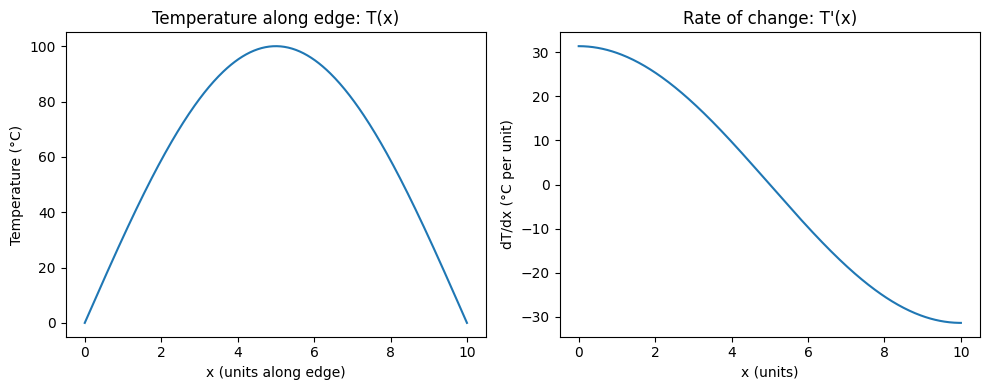

In [8]:
#2 Calculating the temperature variation for cutting the steel plate
def T(x):
  return 100 * np.sin((pi * x) / 10)

def T_prime(x):
  return 100 * (pi / 10) * np.cos((pi * x) / 10)


domain_x= np.linspace(0, 10, 401)
t_vals = T(domain_x)
tp_vals = T_prime(domain_x)
max_abs_tp= np.max(np.abs(tp_vals))
max_points= domain_x[np.isclose(np.abs(tp_vals), max_abs_tp)]

print(f"Maximum |T'(x)| = {max_abs_tp:.4f} °C/ unit. Occurs at x (in [0, 10]): {np.unique(np.round(max_points, 6))}")


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(domain_x, t_vals)
plt.title("Temperature along edge: T(x)")
plt.xlabel("x (units along edge)")
plt.ylabel("Temperature (°C)")

plt.subplot(1,2,2)
plt.plot(domain_x, tp_vals)
plt.title("Rate of change: T'(x)")
plt.xlabel("x (units)")
plt.ylabel("dT/dx (°C per unit)")
plt.tight_layout()
plt.show()

P(error > 3°C) for N(0,2): 0.066807


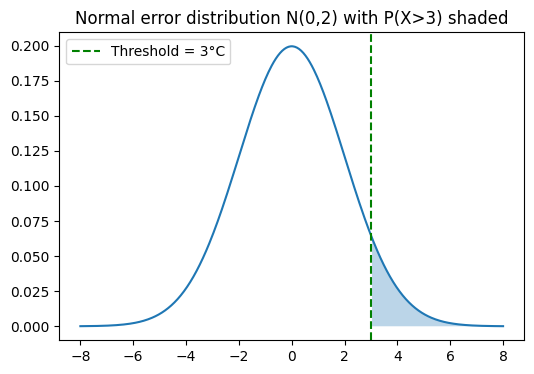

In [9]:
#3 Finding the probability that a random error is greater than 3°C.
mu_error= 0
sigma_error = 2
threshold=3

prob_gt_3= stats.norm.sf(threshold, loc=mu_error, scale=sigma_error)
print(f"P(error > 3°C) for N(0,2): {prob_gt_3:.6f}")

x_range=np.linspace(-8, 8, 401)
pdf_vals= stats.norm.pdf(x_range, loc=mu_error, scale= sigma_error)
plt.figure(figsize=(6,4))
plt.plot(x_range, pdf_vals)
plt.fill_between(x_range, 0, pdf_vals, where=(x_range>threshold), alpha=0.3)
plt.axvline(threshold, color='green', linestyle= '--', label=f'Threshold = {threshold}°C')
plt.title("Normal error distribution N(0,2) with P(X>3) shaded")
plt.legend()
plt.show()


Sample Measurements: [ 99 100  98 101  97  99 100  98]
Sample Mean = 99.000, s=1.309, n= 8
t-statistic = -2.1602, two-sided p-value = 0.0676
Fail to reject H0 at alpha= 0.05: no evidence mean differs from 100


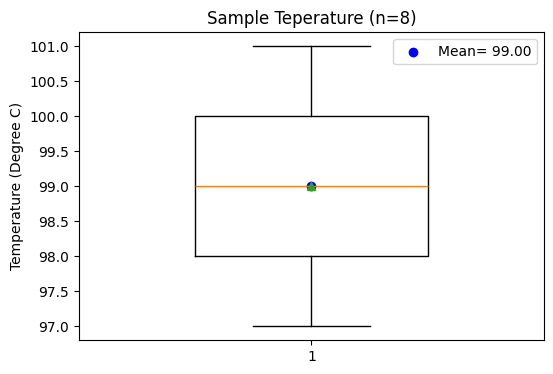

In [10]:
#4 To calculate if true mean temperature is 100°C across the plate when significance level is 5%

measurements= np.array([99, 100, 98, 101, 97, 99, 100, 98])
n= len(measurements)
sample_mean = measurements.mean()
sample_std = measurements.std(ddof=1)
mu0=100
alpha= 0.05

t_stat, p_value_two_sided= stats.ttest_1samp(measurements, popmean=mu0)
print("\nSample Measurements:", measurements)
print("Sample Mean = {:.3f}, s={:.3f}, n= {}".format(sample_mean, sample_std, n))
print("t-statistic = {:.4f}, two-sided p-value = {:.4f}".format(t_stat, p_value_two_sided))

if p_value_two_sided < alpha:
  print(f"Reject H0 at alpha= {alpha}: evidence mean!= {mu0}")
else:
  print(f"Fail to reject H0 at alpha= {alpha}: no evidence mean differs from {mu0}")

plt.figure(figsize=(6,4))
plt.boxplot(measurements, vert=True, widths=0.5, showmeans=True)
plt.scatter(1, sample_mean, color='blue', label=f'Mean= {sample_mean:.2f}')
plt.title("Sample Teperature (n=8)")
plt.ylabel("Temperature (Degree C)")
plt.legend()
plt.show()